<h2> CSV con informacion geográfica básica de los países del mundo <h2>

In [1]:
#Importacion de librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
#Importacion de archivo csv para analisis
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df=pd.read_csv(url,sep=";")
df.head(5)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [3]:
df.shape #Revsion de cantidad de filas y columnas

(252, 19)

In [4]:
df.columns #Revision de encabezados

Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')

In [5]:
df.info() #Revision de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [6]:
df.describe() #Revision de estadisticas

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


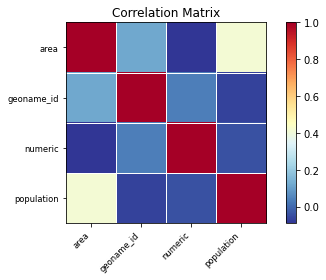

In [7]:
#Se grafica el coeficiente de correlacion (Para observar relaciones entre variables)
# Utiliza liberia matplotlib
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


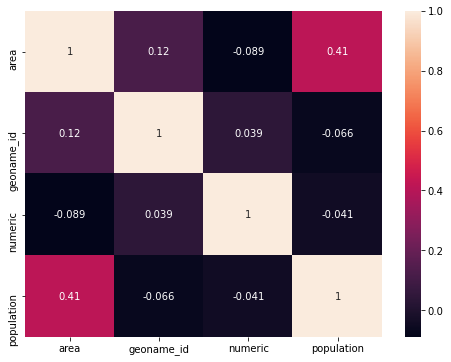

In [8]:
#Coeficiente de correlacion con liberia seaborn
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
# En este set de datos se identifican columnas con valores nulos
#Se observan variables tipo object, float e integer
#Existe baja correlacion entre varaibales, la correlacion mas evidente es en las variables area y population.

<h2>CSV crecimiento de la población en los últimos años, con filtro a España </h2>

In [10]:
#Se importa el archivo CSV para analsis
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head(5))

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460


In [11]:
#Se hace filtro de pais por España
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
print(df_pop_es.head())


     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


<AxesSubplot:>

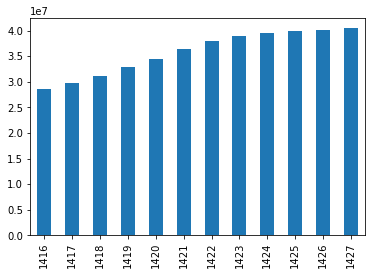

In [12]:
#Grafico de poblacion sin eje x
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

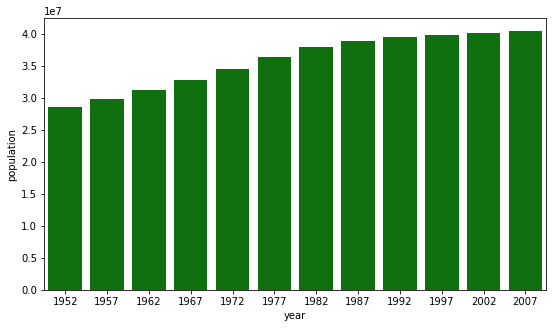

In [13]:
#Utilizo la liberia seaborn para ver la relacion entre años y poblacion.
ax=sns.barplot(x=df_pop_es["year"],y=df_pop_es["population"],data=df_pop_es, color="green")
plt.gcf().set_size_inches(9, 5)

In [14]:
#Filtro de dataframe pais Argentina
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]
df_pop_ar.head(5)

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


<AxesSubplot:>

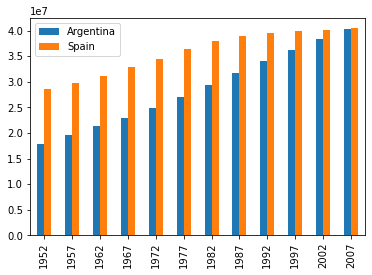

In [15]:
#Selecciona los años que no se repiten
anios = df_pop_es['year'].unique()

#Seleciona todos los valores de poblacion de cada uno de las variables (España y Argentina)
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

#Crea un dataframe con las variables y luego un grafico de barras
df_plot = pd.DataFrame({'Argentina': pop_ar,
                    'Spain': pop_es}, 
                       index=anios)
#Se crea el tipo de grafico de barras
df_plot.plot(kind='bar')

In [16]:
#Reemplaza lsos valores null por vacio
df_espanol = df.replace(np.nan, '', regex=True)

#Filtro de datos por sting "es" Español
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol.head(5)


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz


<AxesSubplot:xlabel='alpha_3'>

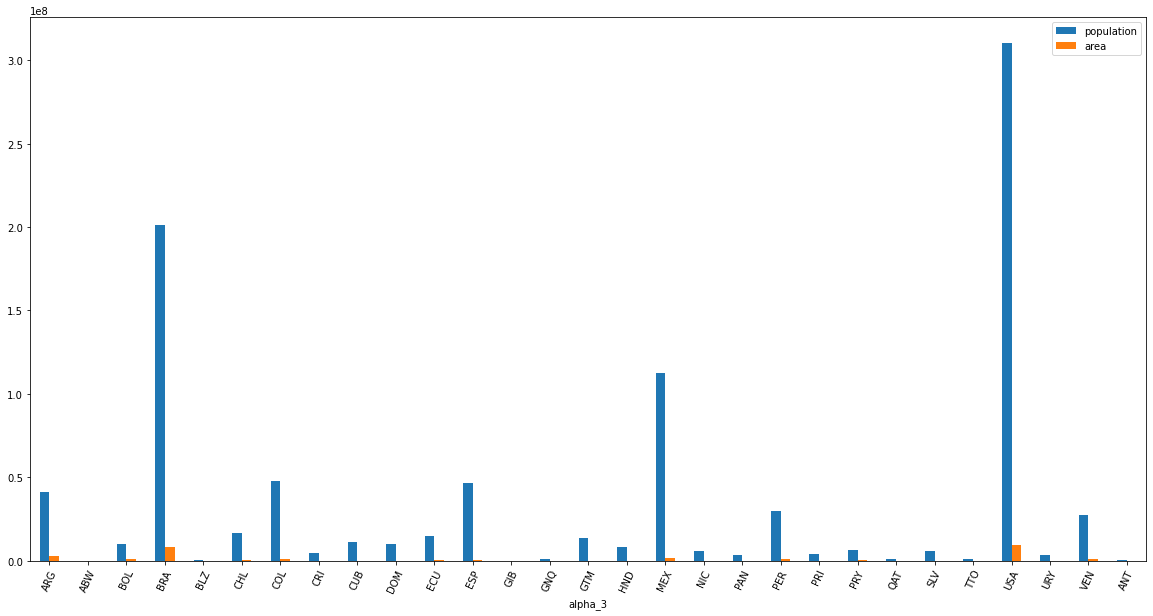

In [17]:
#Grafico de poblacion y area por pais
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

In [18]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] &lt; lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

SyntaxError: invalid syntax (<ipython-input-18-e26fa1ea84bc>, line 21)